./classifier.pkl
./Fertilizer Prediction.csv
./fertilizer_model.pkl
./frontend.py
./label_encoder.pkl
./main.py
./ml.ipynb
./ml.py
./requirements.txt
./trained_columns.pkl
./.git\config
./.git\description
./.git\HEAD
./.git\index
./.git\packed-refs
./.git\hooks\applypatch-msg.sample
./.git\hooks\commit-msg.sample
./.git\hooks\fsmonitor-watchman.sample
./.git\hooks\post-update.sample
./.git\hooks\pre-applypatch.sample
./.git\hooks\pre-commit.sample
./.git\hooks\pre-merge-commit.sample
./.git\hooks\pre-push.sample
./.git\hooks\pre-rebase.sample
./.git\hooks\pre-receive.sample
./.git\hooks\prepare-commit-msg.sample
./.git\hooks\push-to-checkout.sample
./.git\hooks\update.sample
./.git\info\exclude
./.git\logs\HEAD
./.git\logs\refs\heads\main
./.git\logs\refs\remotes\origin\HEAD
./.git\objects\pack\pack-be10ad6703705f35462f9a57214d4d714662e72c.idx
./.git\objects\pack\pack-be10ad6703705f35462f9a57214d4d714662e72c.pack
./.git\refs\heads\main
./.git\refs\remotes\origin\HEAD
   Temparature  Hu

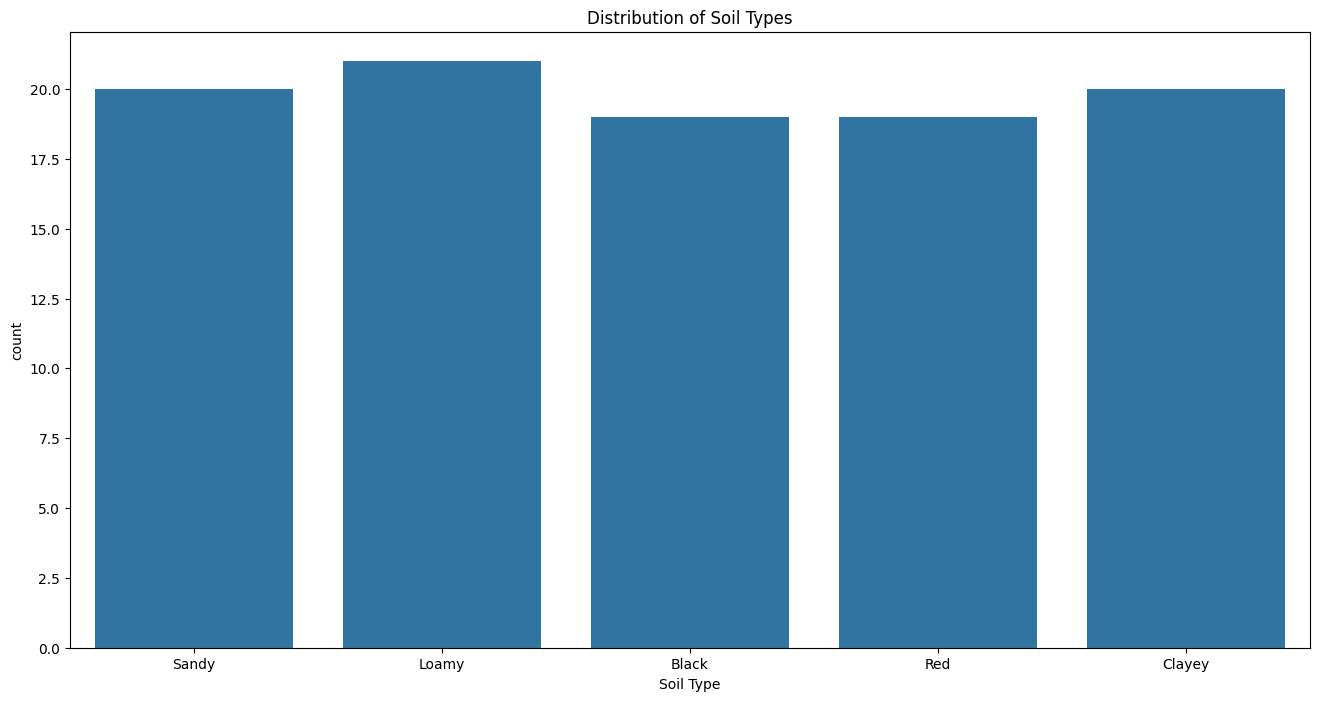

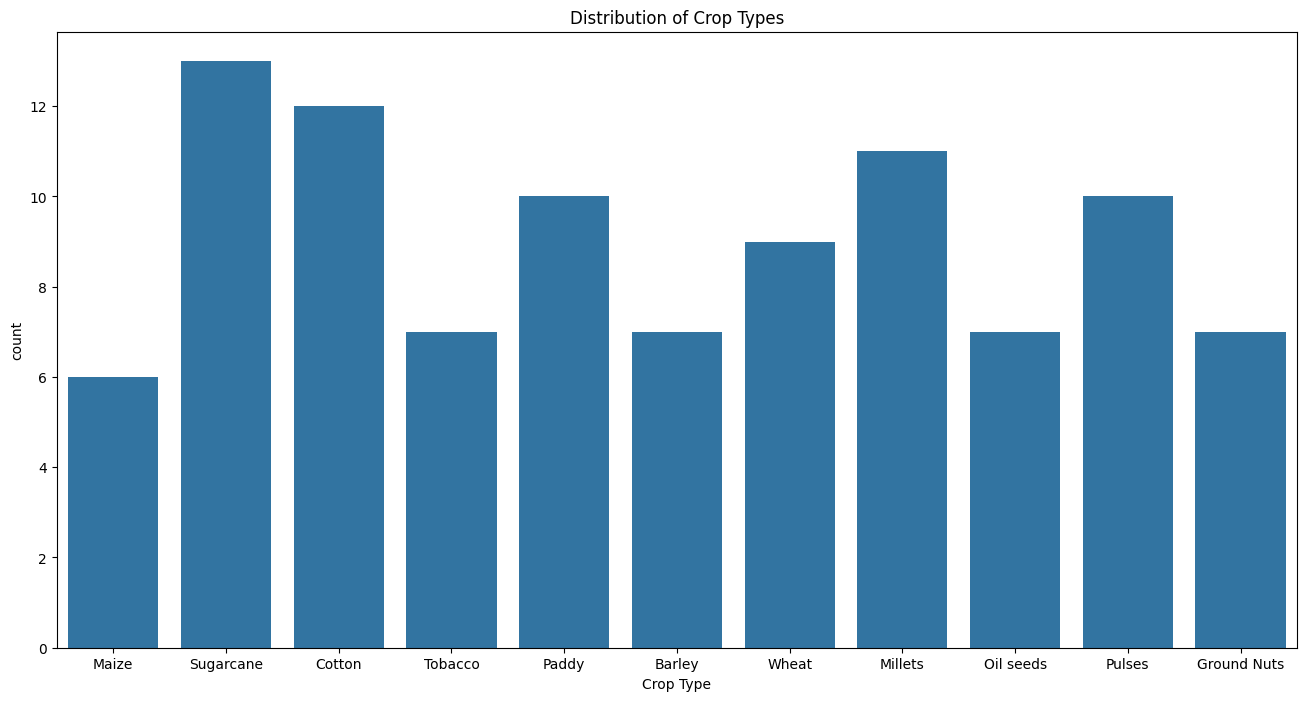

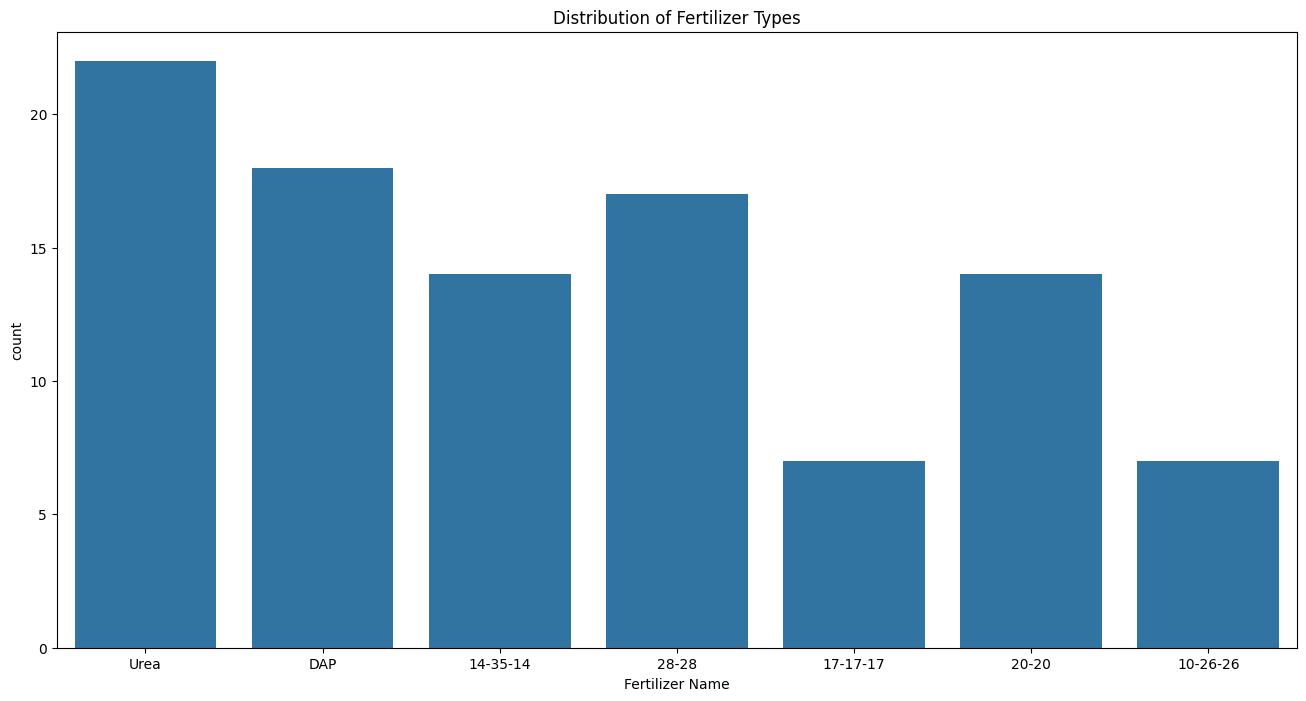

Confusion Matrix:
 [[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]
Accuracy Score: 0.9666666666666667
Model Score: 0.9666666666666667
Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best Score: 0.9748338081671415
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Recommended Fertilizer: 14

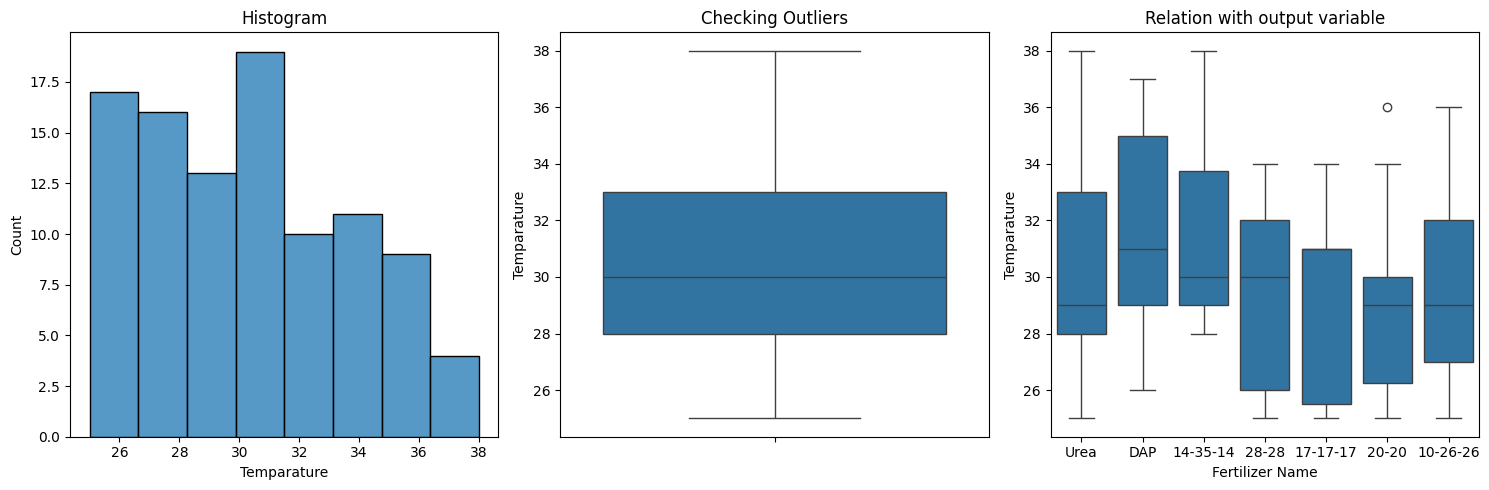

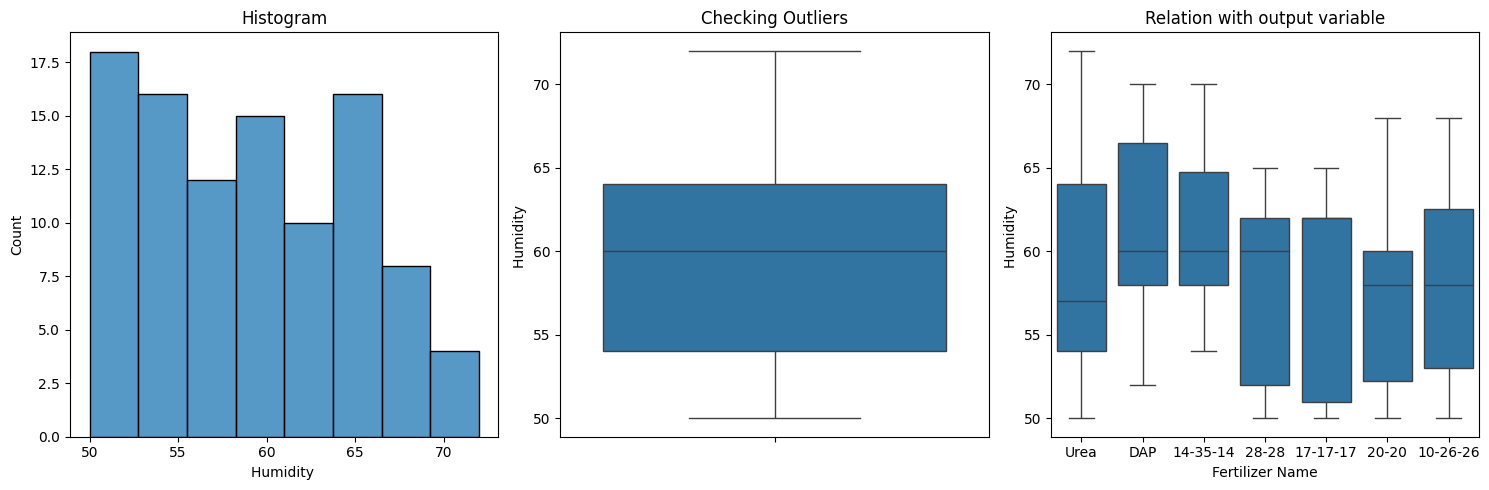

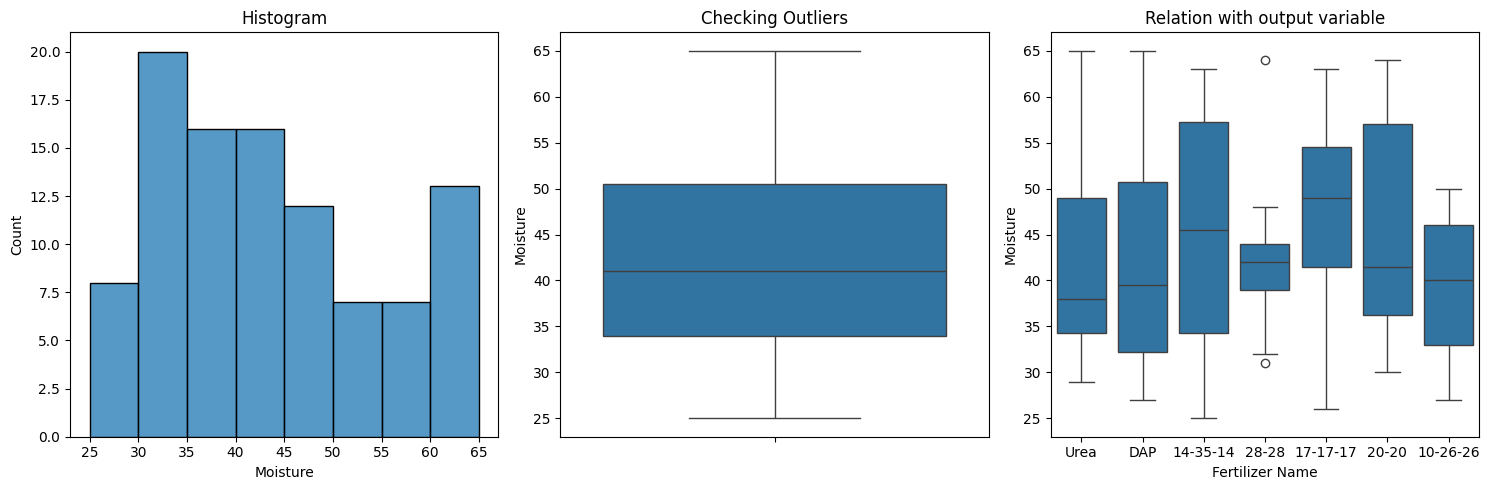

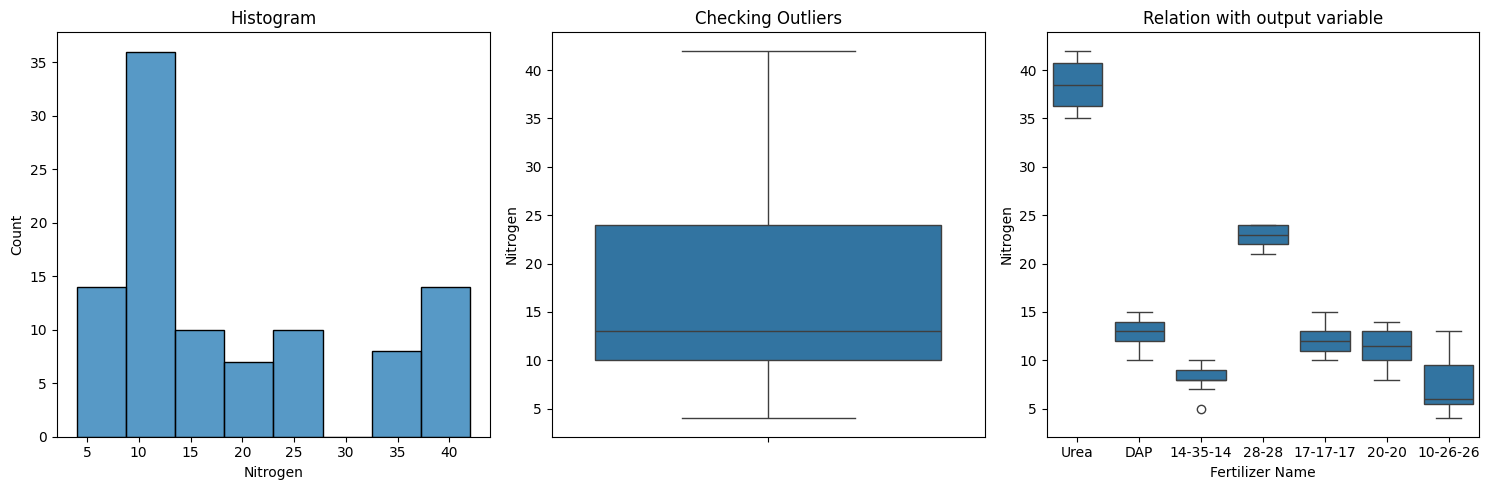

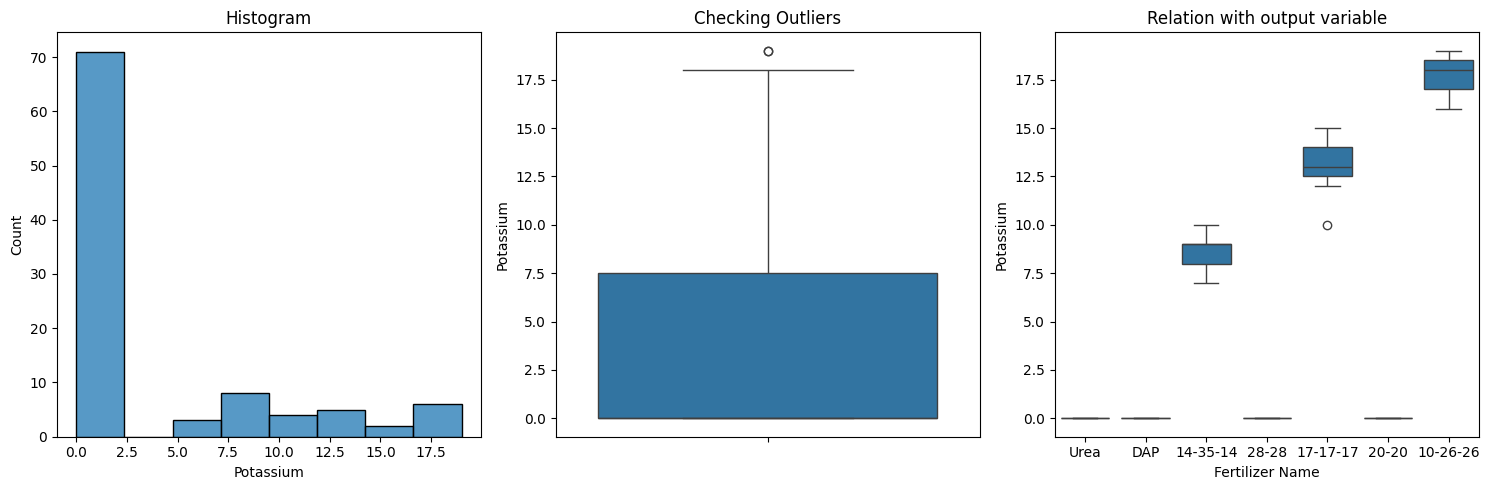

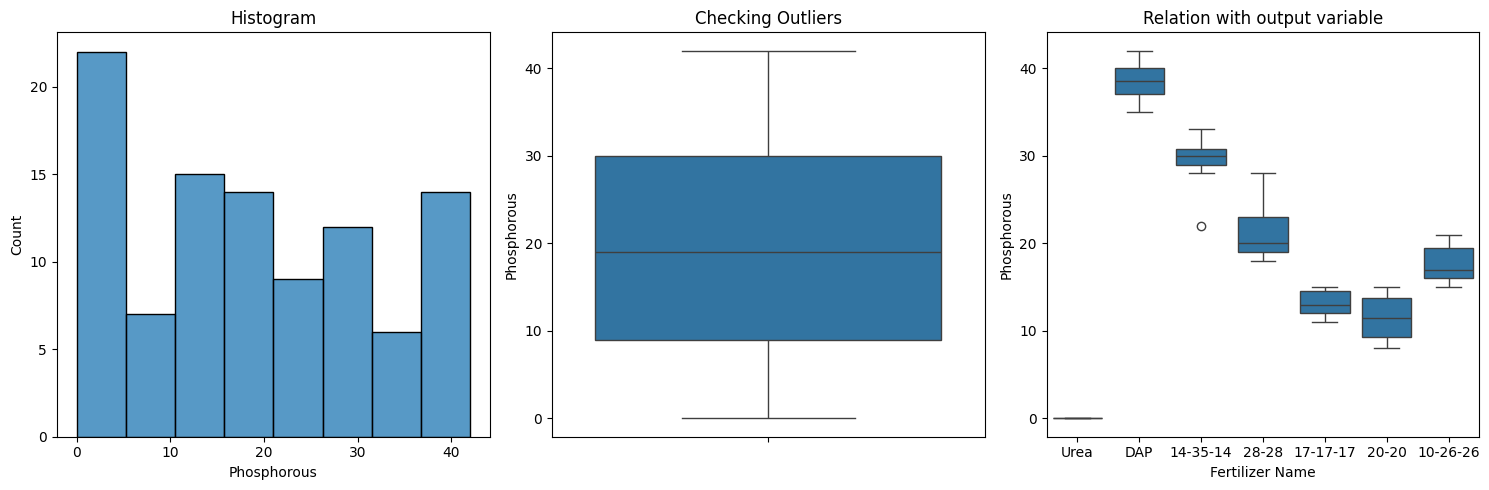

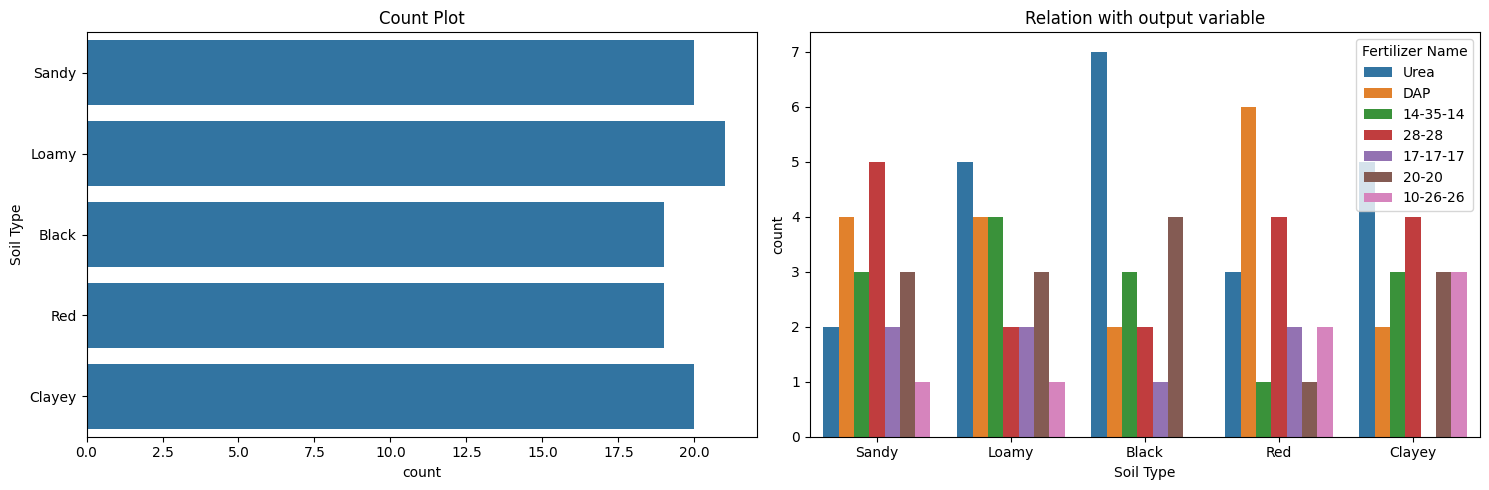

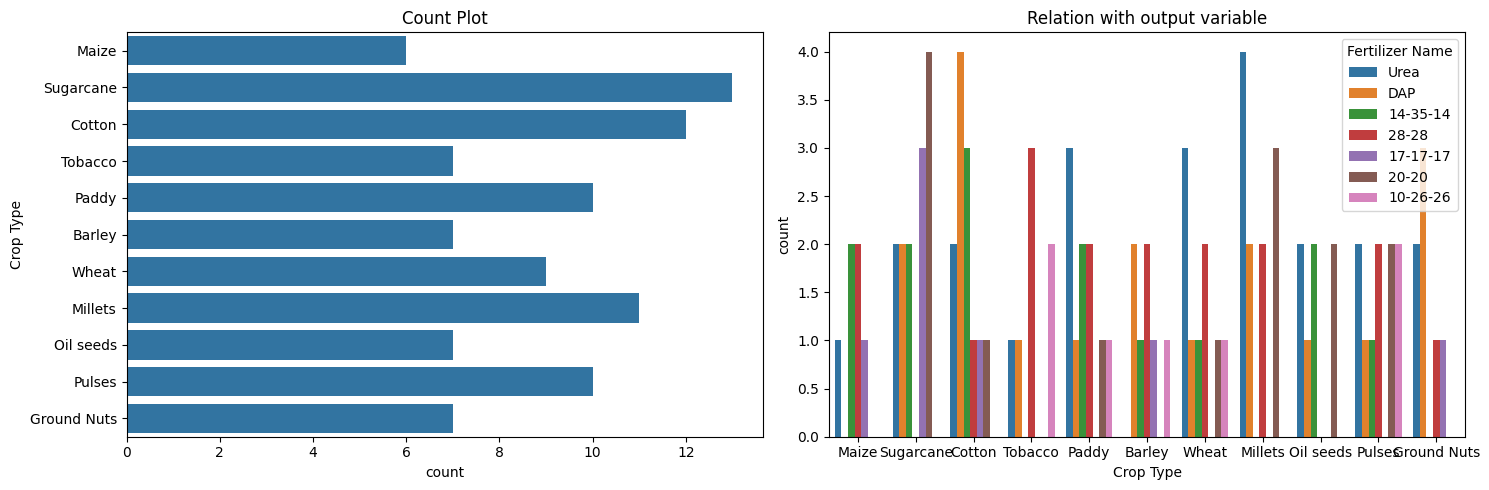

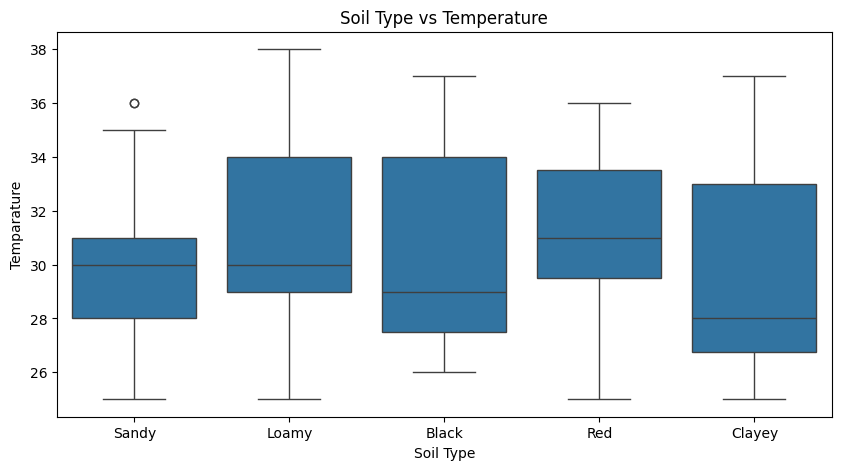

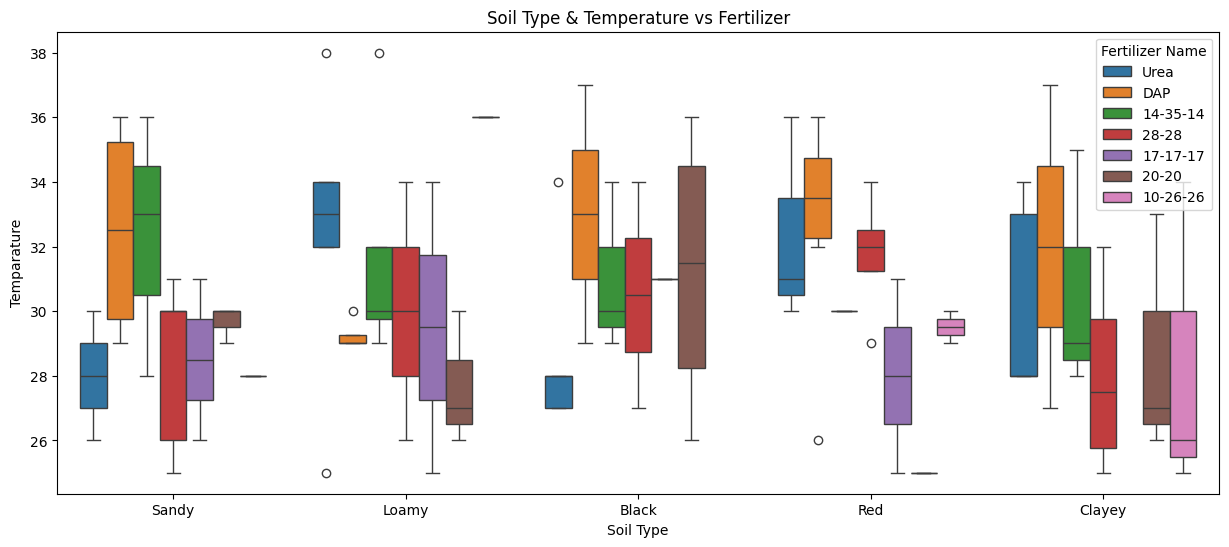

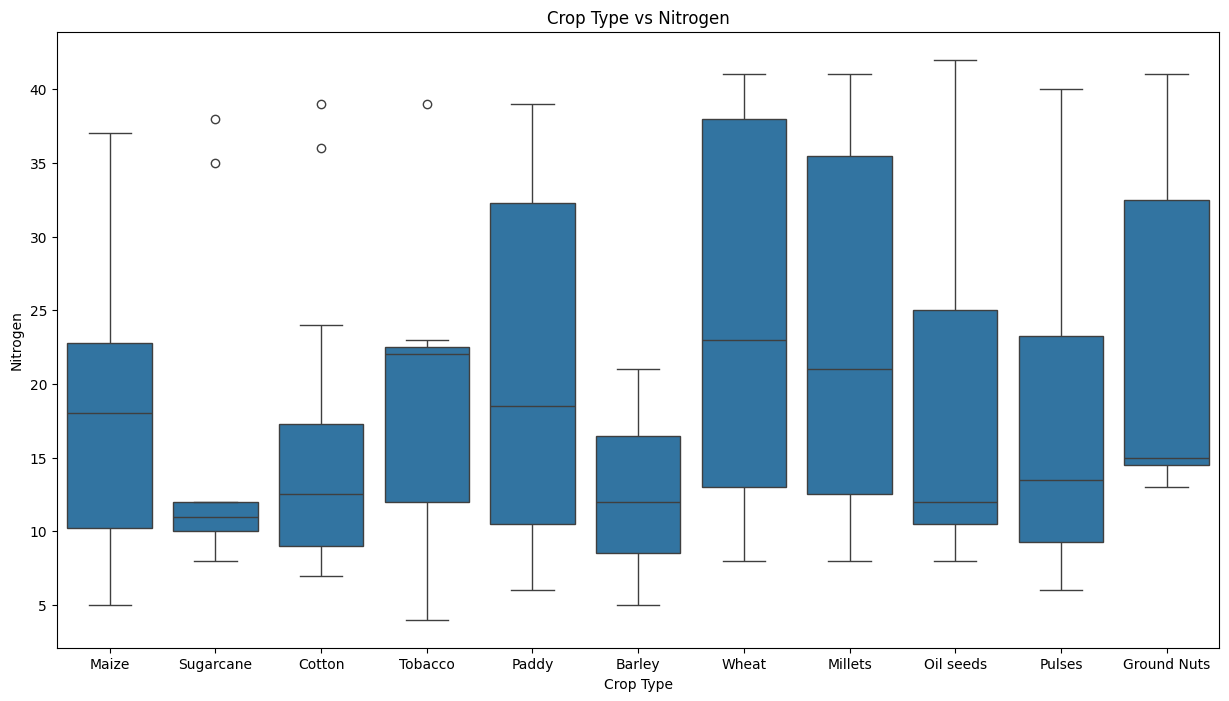

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")

# Checking available datasets in Kaggle environment
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Reading dataset
df = pd.read_csv("./Fertilizer Prediction.csv")

# Displaying basic information
print(df.head())
print(df.describe())
print("Unique Soil Types:", df['Soil Type'].unique())

# Data Visualization
plt.figure(figsize=(16,8))
sns.countplot(x='Soil Type', data=df)
plt.title("Distribution of Soil Types")
plt.show()

plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data=df)
plt.title("Distribution of Crop Types")
plt.show()

plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data=df)
plt.title("Distribution of Fertilizer Types")
plt.show()

# Defining function for continuous and categorical variable visualization
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x, ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x, ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y=x, x=df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x, ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x=x, hue=df['Fertilizer Name'], ax=axes[1])

# Exploring numerical features
plot_conti(df['Temparature'])
plot_conti(df['Humidity '])
plot_conti(df['Moisture'])
plot_conti(df['Nitrogen'])
plot_conti(df['Potassium'])
plot_conti(df['Phosphorous'])

# Exploring categorical features
plot_cato(df['Soil Type'])
plot_cato(df['Crop Type'])

# Checking relationships
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'], y=df['Temparature'])
plt.title("Soil Type vs Temperature")

plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'], y=df['Temparature'], hue=df['Fertilizer Name'])
plt.title("Soil Type & Temperature vs Fertilizer")

plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'], y=df['Nitrogen'])
plt.title("Crop Type vs Nitrogen")

# Preprocessing using One-Hot Encoding
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Model Score:", classifier.score(X_test, y_test))

# Test accuracy = 96.67%

# Preprocessing using Label Encoding
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

encode_crop = LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

# Splitting dataset again for label encoding
x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name', axis=1), df['Fertilizer Name'], test_size=0.2, random_state=1)

# Training Random Forest with Label Encoding
rand = RandomForestClassifier(random_state=42)
rand.fit(x_train, y_train)
pred_rand = rand.predict(x_test)

# Hyperparameter Tuning using GridSearchCV
params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 8]
}

grid_rand = GridSearchCV(rand, params, cv=3, verbose=3, n_jobs=-1)
grid_rand.fit(x_train, y_train)
pred_rand = grid_rand.predict(x_test)

# Model Evaluation after Tuning
print(classification_report(y_test, pred_rand))
print("Best Score:", grid_rand.best_score_)
print("Best Parameters:", grid_rand.best_params_)

# Best score = 97.48%

# Saving Model using Pickle
pickle_out = open('classifier.pkl', 'wb')
pickle.dump(grid_rand, pickle_out)
pickle_out.close()

# Loading Model for Prediction
model = pickle.load(open('classifier.pkl', 'rb'))

# Sample Prediction
sample_input = [[34, 65, 62, 0, 1, 7, 9, 30]]
ans = model.predict(sample_input)

# Mapping Predictions to Fertilizer Names
fertilizer_mapping = {
    0: "10-26-26",
    1: "14-35-14",
    2: "17-17-17",
    3: "20-20",
    4: "28-28",
    5: "DAP",
    6: "Urea"
}

print("Recommended Fertilizer:", fertilizer_mapping.get(ans[0], "Unknown"))


In [1]:
print(df.columns)


NameError: name 'df' is not defined